<a href="https://colab.research.google.com/github/Julianpucheta/CODE2022/blob/main/Ide_Chen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se detalla el empleo del algoritmo de Chen para identificación de sistemas mediante excitación de entrada escalón.

En el siguiente script, que es para emplear el método Chen de identificación de sistemas lineales, se requieren signal, io, y control. Lei Chen, Junhong Li. “Identification for the second-order systems based on the step response”. Ruifeng Ding Mathematical and Computer Modelling 53 (2011) 1074–1083. https://linkinghub.elsevier.com/retrieve/pii/S0895717710005613. También disponible en el material del Curso 2022 en https://mega.nz/file/CtYSzSiB#4cAApwsBxTlLgIeawRDPy1TK_x_gOQK4d2uxgifZMsU.

In [2]:
!apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave is already the newest version (4.2.2-1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


Si se necesitan paquetes extras de Octave, se deben cargar. 

In [4]:
!apt install octave-signal

Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave-signal is already the newest version (1.3.2-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [6]:
!apt install octave-io

Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave-io is already the newest version (2.4.10-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [8]:
!apt install octave-control

Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave-control is already the newest version (3.0.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [9]:
%%writefile ID_Chen.m
clc; clear all; close all;
pkg load control
pkg load signal
pkg load io
warning('off','all');
%/content/Curvas_Medidas_Motor.xlsx
tabla=xlsread('/content/Curvas_Medidas_Motor.xlsx');
t_D=tabla(:,1);
y_D=tabla(:,2);
StepAmplitude=12; %12 V de entrada en Va
%wr/va
ret     =       0.0201;
t       =       5e-4;
[val lugar] =min(abs(t+ret-t_D));%Busco en ret+t1
y_t=y_D(lugar);
t=t_D(lugar)-ret; %t1

[val lugar] =min(abs(2*t+ret-t_D));
y_t2=y_D(lugar);
t2=t_D(lugar)-ret;

[val lugar] =min(abs(3*t+ret-t_D));
y_t3=y_D(lugar);
t3=t_D(lugar)-ret;
% break
% K=y(00)/U
k       =       198.2488022/12;  
% %CORROBORADOR DE PUNTOS
% plot(tabla(:,1),tabla(:,2))
% hold on
% plot(t+ret,y_t,'o')
% plot(t2+ret,y_t2,'o')
% plot(t3+ret,y_t3,'o')
%METODO DE CHEN
%Funcion de la forma G(s)=K*(s+T3)/[(s+T1+1).(s+T2+1)] luego se puede
%despreciar el cero
k1      =       (1/StepAmplitude)*y_t/k-1;
k2      =       (1/StepAmplitude)*y_t2/k-1; 
k3      =       (1/StepAmplitude)*y_t3/k-1; 
b       =       4*k1^3*k3-3*k1^2*k2^2-4*k2^3+k3^2+6*k1*k2*k3;
alfa1   =       (k1*k2+k3-sqrt(b))/(2*(k1^2+k2));
alfa2   =       (k1*k2+k3+sqrt(b))/(2*(k1^2+k2));
beta    =       (2*k1^3+3*k1*k2+k3-sqrt(b))/(sqrt(b));
T1      =       (-t/log(alfa1))
T2      =       (-t/log(alfa2))
T1=real(T1);T2=real(T2);%importa sólo la parte real
T3      =       real(beta*(T1-T2)+T1);
sys_va=tf(k,conv([T1 1],[T2 1]));
dt=3e-5;
t_s=0:dt:t_D(end-1);
u1_Va=zeros(ret/dt,1);
u2_Va=12*ones((.6-ret)/dt,1);%Va=12V
u1_T=zeros(fix(.1000/dt)+1,1); %TL=0
u2_T=ones(fix((.6-.100)/dt),1);
u_Va=[u1_Va;u2_Va];
% plot(t_s,u_Va);title('Tensión de entrada')
u_T=[u1_T;u2_T];
% plot(t_s,u_T);title('Torque de entrada')
[y1,t1,ent]=lsim(sys_va, u_Va, t_s, [0,0]);
% figure
% plot(tabla(:,1),tabla(:,2))
% hold on
% plot(t1,y1,'k')
% plot(t+ret,y_t,'o')
% plot(t2+ret,y_t2,'o')
% plot(t3+ret,y_t3,'o')
% break
%wr/TL
% t_tl       =       0.1002-ret_tl;                   
% y_t_tl     =       160.549509;
ret_tl     =       0.1+2e-4;
t_tl=2e-4;
[val lugar] =min(abs(t_tl+ret_tl-t_D));
y_t_tl=y_D(lugar);
t_tl=t_D(lugar)-ret_tl;
% t2_tl      =       0.1005-ret_tl;
% y_t2_tl    =       101.4371121;
[val lugar] =min(abs(2*t_tl+ret_tl-t_D));
y_t2_tl=y_D(lugar);
t2_tl=t_D(lugar)-ret_tl;
% t3_tl      =       0.1008-ret_tl;
% y_t3_tl    =       72.4383423;
[val lugar] =min(abs(3*t_tl+ret_tl-t_D));
y_t3_tl=y_D(lugar);
t3_tl=t_D(lugar)-ret_tl;
% 7,5 10-2
TL=7.5e-2;% TL:Amplitud del escalon de Torque de entrada
% K=y(00)/U
k_tl       =       -(46.2-198)/TL;
% %CORROBORADOR DE PUNTOS
% plot(tabla(:,1),-tabla(:,2)+k)
% hold on
% plot(t_tl+ret_tl,y_t_tl,'o')
% plot(t2_tl+ret_tl,y_t2_tl,'o')
% plot(t3_tl+ret_tl,y_t3_tl,'o')
%METODO DE CHEN
% % % k1_tl      =      (1/TL)*y_t_tl/k_tl-1;
% % % k2_tl      =   (1/TL)*y_t2_tl/k_tl-1; 
% % % k3_tl      =     (1/TL)*y_t3_tl/k_tl-1; 
yid_1=-(y_t_tl-198.2)
yid_2=-(y_t2_tl-198.2)
yid_3=-(y_t3_tl-198.2)
% plot(tabla(:,1),tabla(:,2));hold on;%plot(t_tl,yid_1,'o',t2_tl,yid_2,'o',t3_tl,yid_3,'o')
% plot(t_tl+ret_tl,yid_1,'o',t2_tl+ret_tl,yid_2,'o',t3_tl+ret_tl,yid_3,'o')
k1_tl      =      (1/TL)*yid_1/k_tl-1;
k2_tl      =   (1/TL)*yid_2/k_tl-1; 
k3_tl      =     (1/TL)*yid_3/k_tl-1; 
b_tl       =       4*k1_tl^3*k3_tl-3*k1_tl^2*k2_tl^2-4*k2_tl^3+k3_tl^2+6*k1_tl*k2_tl*k3_tl;
alfa1_tl   =       (k1_tl*k2_tl+k3_tl-sqrt(b_tl))/(2*(k1_tl^2+k2_tl));
alfa2_tl   =       (k1_tl*k2_tl+k3_tl+sqrt(b_tl))/(2*(k1_tl^2+k2_tl));
beta_tl    =       (2*k1_tl^3+3*k1_tl*k2_tl+k3_tl-sqrt(b_tl))/(sqrt(b_tl));
T1_tl      =       (-t_tl/log(alfa1_tl)) 
T2_tl      =       (-t_tl/log(alfa2_tl))
T1_tl=real(T1_tl);T2_tl=real(T2_tl);
%importa sólo la parte real
T3_tl      =       beta_tl*(T1_tl-T2_tl)+T1_tl;
sys_T=tf(k_tl*[T3_tl 1],conv([T1_tl 1],[T2_tl 1]));
dt=3e-5;
t_s=(0:dt:t_D(end-1))';
u1_Va=zeros(ret/dt,1);
u2_Va=12*ones((.6-ret)/dt,1);%Va=12V
u1_T=zeros(fix(.1000/dt)+1,1); %TL=0
u2_T=TL*ones(fix((.6-.100)/dt),1);
u_Va=[u1_Va;u2_Va];
% plot(t_s,u_Va);title('Tensión de entrada')
u_T=[u1_T;u2_T];
% plot(t_s,u_T);title('Torque de entrada')
[y2,t2_,ent2]=lsim(sys_T, u_T, t_s,[0,0]);
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
hold on;
plot(tabla(:,1),tabla(:,2))
plot(t_s,y1-y2,'r');legend('Datos','Modelado')
plot(t +ret,y_t,'o',t2+ret,y_t2,'o',t3+ret,y_t3,'o')
plot(t_tl+ret_tl,y_t_tl,'o',t2_tl+ret_tl,y_t2_tl,'o',t3_tl+ret_tl,y_t3_tl,'o')
print(hfig1,'Resultados_ID_Chen','-dpng');
save('ID_Chen.mat','-v7');

Writing ID_Chen.m


Antes de correr el script de .m, debe cargarse el archivo con las curvas al entorno, empleando el ícono de subir archivo. Se recomienda emplear formatos compatibles.

Se puede correr el script y mostrar las imágenes generadas, con la librería PIL de Python.

Detected XLS interfaces: OpenJDK 64-Bit Server VM warning: Archived non-system classes are disabled because the java.system.class.loader property is specified (value = "org.octave.OctClassLoader"). To use archived non-system classes, this property must be not be set
T1 =    4.0791e-04
T2 =  2.8211e-05 + 5.0602e-06i
yid_1 =  85.593
yid_2 =  109.84
yid_3 =  126.97
T1_tl =    4.0766e-04
T2_tl =  3.1946e-05 + 4.3247e-05i


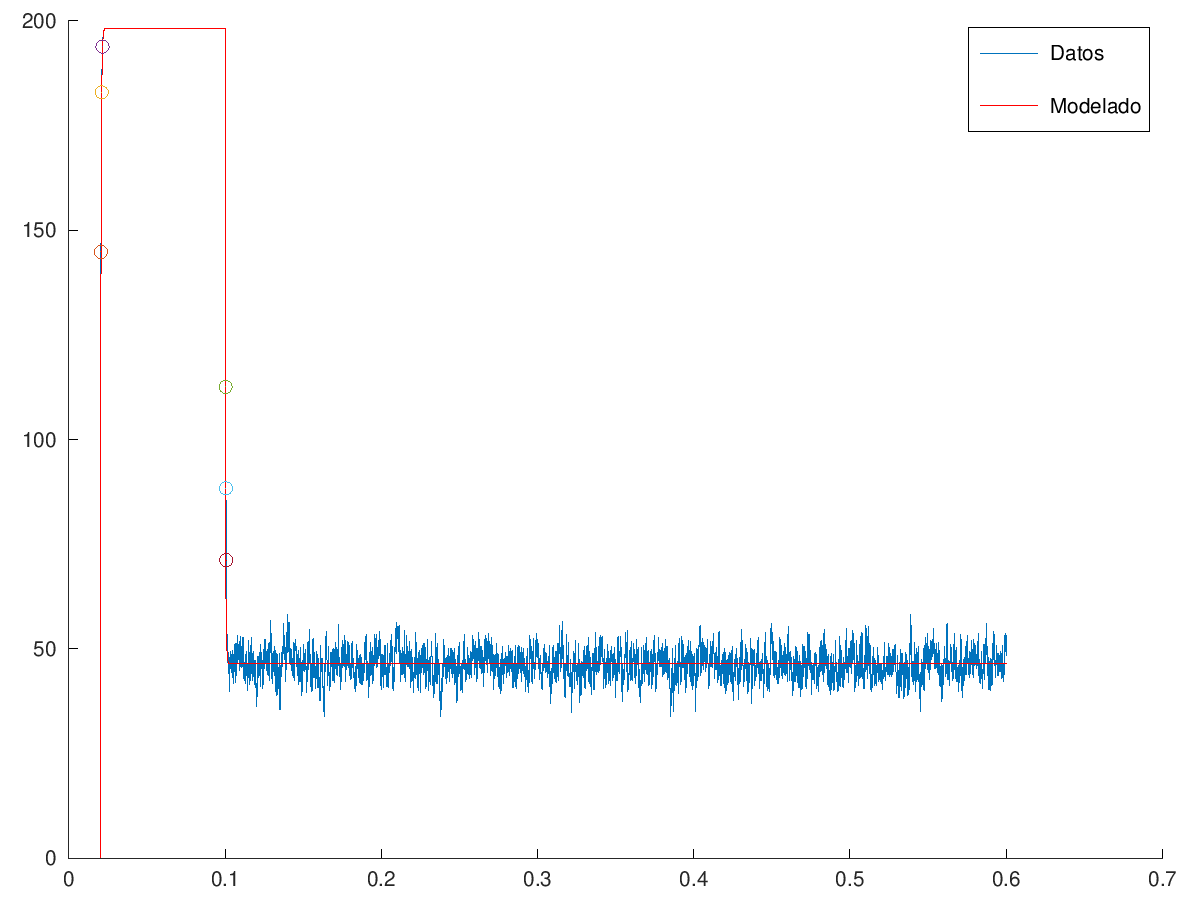

In [10]:
# -W : no window system
!octave -W ID_Chen.m
import scipy.io
mat = scipy.io.loadmat('/content/ID_Chen.mat')
from PIL import Image
imt = Image.open("/content/Resultados_ID_Chen.png")
imt

También puede emplearse el comando save() desde el script, y luego desde Colab levantar el archivo. En éste caso ID_Chen.mat. Luego se emplean funciones Python de matplotlib y se muestran las variables de interés.

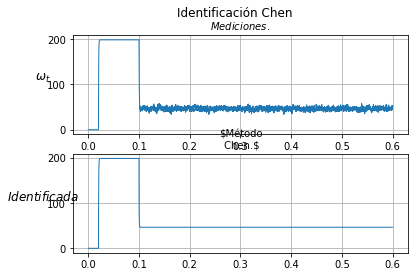

In [11]:
import numpy as np
import scipy.io
mat = scipy.io.loadmat('/content/ID_Chen.mat')
#%plot(t,ys,'r');title('Control realimentación de estados');xlabel('Tiempo');
y1=mat.get('y1')
y2=mat.get('y2')
t_s=mat.get('t_s')
t_D=mat.get('t_D')
y_D=mat.get('y_D')
#Importamos los datos que se generaron desde Octave en el archivo .mat
#Ahora empezamos a plotear las variables
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('Identificación Chen')
axs[0].plot(t_D, y_D, linewidth =1.0)
axs[0].grid( True )
axs[0].set_title('$Mediciones.$', fontsize=10);
axs[0].set_ylabel('$\omega_t$',rotation=0, fontsize=12) 
axs[1].plot(t_s, y1-y2, linewidth =1.0)
axs[1].set_ylabel('$Identificada$',rotation=0, fontsize=12)
axs[1].grid( True )
axs[1].set_title('$Método\n Chen.$', fontsize=10);